# All Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.metrics import r2_score

from sklearn.preprocessing import OrdinalEncoder

import plotly.express as px

import pickle

In [35]:
all_data = pd.read_pickle(r'./data/processed/all_data_updated.pickle')

In [36]:
all_data.drop(columns=[
    'Area name',
    'Area type',
    'Specimen date',
    'LAD16NM'
], inplace=True)

all_data.drop(columns=[
    'Cumulative lab-confirmed cases',
    'K_value_2',
    'name',
    'AREAEHECT',
    'AREACHECT',
    'AREAIHECT'
], inplace=True)

all_data.drop(columns=[
    'cases_over_100_enddelta',
    'cases_over_100_active',
    'schools_closed_startdelta',
    'schools_closed_enddelta',
    'schools_closed_active',
    'restaurants_cafes_closed_startdelta',
    'restaurants_cafes_closed_enddelta',
    'restaurants_cafes_closed_active',
    'nationwide_lockdown_startdelta',
    'nationwide_lockdown_enddelta',
    'nationwide_lockdown_active',
    'K_value_1',
    'population density deciles',
    'Dependency Ratio',
    'Cumulative lab-confirmed cases rate',
    'ref_r0',
], inplace=True)

In [37]:
all_data.dropna(inplace=True)

In [38]:
all_data.columns

Index(['Area code', 'Daily lab-confirmed cases', 'Date', 'Name', 'Geography1',
       'Population', 'grad_0', 'grad_n3', 'grad_n7', 'current_r0',
       'previous_day_daily_cases', 'previous_day_cumulative_cases',
       'previous_day_cc_rate', 'rolling_previous_day_cc_rate_3',
       'rolling_r0_3', 'rolling_r0_7', 'rolling_previous_day_daily_cases_4',
       'active_infections', 'currently_suseptible', 'recovered', 'real_r0',
       'previous_rolling_r0_7', 'r0_7_gradient', 'risk_score',
       'cases_over_100_startdelta', 'median age', 'population density',
       'Age 0 to 15', 'Age 65 plus', 'Age 85 plus', 'Working age 16 to 64',
       'Old Age Dependency Ratio', 'risk_score_2', 'AREALHECT'],
      dtype='object')

In [39]:
xgb = XGBRegressor(booster = 'gbtree', 
        objective ='reg:squarederror', 
        colsample_bytree = 0.9, 
        learning_rate = 0.05,
        max_depth = 5,
        alpha = 0.1,
        subsample = 0.6,
        n_estimators = 560,
        min_child_weight = 3,
        gamma = 0.0)

In [40]:
X = all_data.drop(columns=[
    'Area code',
    'Name',
    'Geography1',
    'risk_score',
    'risk_score_2',
    'Date',
    'Daily lab-confirmed cases',
    'real_r0'
])

In [41]:
y = all_data['real_r0']

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16265 entries, 6 to 18108
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          16265 non-null  int64  
 1   grad_0                              16265 non-null  float64
 2   grad_n3                             16265 non-null  float64
 3   grad_n7                             16265 non-null  float64
 4   current_r0                          16265 non-null  float64
 5   previous_day_daily_cases            16265 non-null  float64
 6   previous_day_cumulative_cases       16265 non-null  float64
 7   previous_day_cc_rate                16265 non-null  float64
 8   rolling_previous_day_cc_rate_3      16265 non-null  float64
 9   rolling_r0_3                        16265 non-null  float64
 10  rolling_r0_7                        16265 non-null  float64
 11  rolling_previous_day_daily_cases_4  16265

In [43]:
features = list(X.columns)

In [44]:
features

['Population',
 'grad_0',
 'grad_n3',
 'grad_n7',
 'current_r0',
 'previous_day_daily_cases',
 'previous_day_cumulative_cases',
 'previous_day_cc_rate',
 'rolling_previous_day_cc_rate_3',
 'rolling_r0_3',
 'rolling_r0_7',
 'rolling_previous_day_daily_cases_4',
 'active_infections',
 'currently_suseptible',
 'recovered',
 'previous_rolling_r0_7',
 'r0_7_gradient',
 'cases_over_100_startdelta',
 'median age',
 'population density',
 'Age 0 to 15',
 'Age 65 plus',
 'Age 85 plus',
 'Working age 16 to 64',
 'Old Age Dependency Ratio',
 'AREALHECT']

In [45]:
X[features]

,Population,grad_0,grad_n3,grad_n7,current_r0,previous_day_daily_cases,previous_day_cumulative_cases,previous_day_cc_rate,rolling_previous_day_cc_rate_3,rolling_r0_3,...,r0_7_gradient,cases_over_100_startdelta,median age,population density,Age 0 to 15,Age 65 plus,Age 85 plus,Working age 16 to 64,Old Age Dependency Ratio,AREALHECT
6,261317,23.0,28.5,34.0,0.535714,5.0,75.0,29.4,26.766667,1.089683,...,-0.137755,14,36.3,12444,16.9,12.5,1.7,70.6,17.7,2148.70
7,261317,29.0,32.5,36.0,0.863636,14.0,89.0,34.9,30.566667,0.766450,...,-0.043290,15,36.3,12444,16.9,12.5,1.7,70.6,17.7,2148.70
8,261317,29.0,30.5,32.0,1.333333,10.0,99.0,38.8,34.366667,0.910895,...,-0.054422,16,36.3,12444,16.9,12.5,1.7,70.6,17.7,2148.70
9,261317,33.0,28.0,23.0,1.266667,9.0,108.0,42.3,38.666667,1.154545,...,-0.771429,17,36.3,12444,16.9,12.5,1.7,70.6,17.7,2148.70
10,261317,28.0,28.5,29.0,0.947368,9.0,117.0,45.8,42.300000,1.182456,...,-0.436090,18,36.3,12444,16.9,12.5,1.7,70.6,17.7,2148.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18104,93663,5.0,11.0,17.0,0.307692,2.0,323.0,346.4,344.266667,0.530594,...,-0.129513,83,41.7,996,19.2,19.4,2.5,61.4,31.7,9355.95
18105,93663,5.0,9.5,14.0,0.300000,1.0,324.0,347.5,346.066667,0.327564,...,-0.125974,85,41.7,996,19.2,19.4,2.5,61.4,31.7,9355.95
18106,93663,7.0,9.5,12.0,1.666667,4.0,328.0,351.8,348.566667,0.758120,...,0.139881,86,41.7,996,19.2,19.4,2.5,61.4,31.7,9355.95
18107,93663,6.0,5.5,5.0,1.250000,1.0,329.0,352.8,350.700000,1.072222,...,0.111345,87,41.7,996,19.2,19.4,2.5,61.4,31.7,9355.95


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10)

[0]	validation_0-rmse:0.83334
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.79848
[2]	validation_0-rmse:0.76580
[3]	validation_0-rmse:0.73640
[4]	validation_0-rmse:0.70716
[5]	validation_0-rmse:0.67930
[6]	validation_0-rmse:0.65299
[7]	validation_0-rmse:0.62804
[8]	validation_0-rmse:0.60492
[9]	validation_0-rmse:0.58312
[10]	validation_0-rmse:0.56354
[11]	validation_0-rmse:0.54443
[12]	validation_0-rmse:0.52709
[13]	validation_0-rmse:0.51062
[14]	validation_0-rmse:0.49489
[15]	validation_0-rmse:0.48052
[16]	validation_0-rmse:0.46747
[17]	validation_0-rmse:0.45494
[18]	validation_0-rmse:0.44334
[19]	validation_0-rmse:0.43321
[20]	validation_0-rmse:0.42271
[21]	validation_0-rmse:0.41300
[22]	validation_0-rmse:0.40355
[23]	validation_0-rmse:0.39530
[24]	validation_0-rmse:0.38749
[25]	validation_0-rmse:0.38032
[26]	validation_0-rmse:0.37409
[27]	validation_0-rmse:0.36840
[28]	validation_0-rmse:0.36323
[29]	validation_0-rmse:0.35768
[30]	validation

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=560, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0,
             reg_alpha=0.100000001, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6, tree_method=None, validate_parameters=False,
             verbosity=None)

In [15]:
r0_pred = xgb.predict(X_test)

In [16]:
r2_score(y_test, r0_pred)

0.8031977958096773

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
cvs = cross_val_score(xgb, X, y, cv=5, verbose=1, scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.7s finished


In [32]:
cvs.mean()

0.7935436876679185

In [33]:
f_imp = pd.DataFrame({'Features':features, 'Importance':xgb.feature_importances_}).sort_values('Importance')

<BarContainer object of 26 artists>

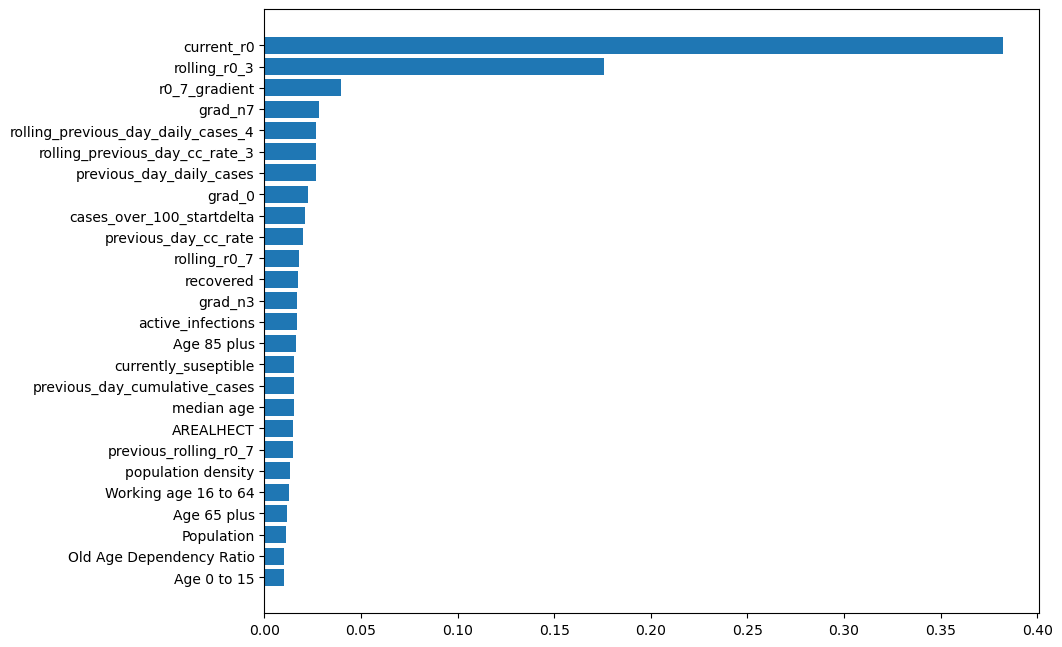

In [34]:
plt.figure(figsize=(10,8), dpi=100)
plt.barh(y=f_imp['Features'], width=f_imp['Importance'])

In [17]:
features.index('cases_over_100_startdelta')

17

In [18]:
test = pd.DataFrame({'cases_over_100_startdelta':X_test['cases_over_100_startdelta'], 'True r0':y_test, 'Predicted r0':r0_pred})

In [19]:
test

,cases_over_100_startdelta,True r0,Predicted r0
9506,32,1.285714,1.138868
10594,42,0.522727,0.517718
5289,44,0.516129,0.553598
459,25,1.275000,1.221845
16165,57,1.147541,0.997680
...,...,...,...
7335,79,1.200000,1.246827
13372,81,0.166667,0.355302
9217,38,1.028571,1.287091
3362,52,1.085106,1.146790


In [20]:
test['Ratio'] = test['Predicted r0']/test['True r0']

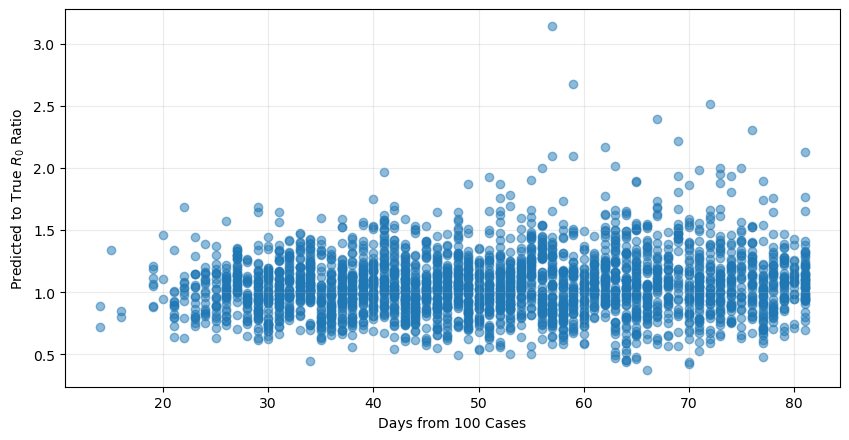

In [21]:
plt.figure(figsize=(10,5), dpi=100)
plt.scatter(test['cases_over_100_startdelta'], test['Ratio'], alpha=0.5)
plt.xlabel('Days from 100 Cases')
plt.ylabel('Predicted to True $R_0$ Ratio')
plt.grid(alpha=0.25)
plt.show()

In [22]:
test['Ratio'].mean()

1.0582583669016516

In [23]:
test['Ratio'].std()

0.24794677238695462

# Retrain model with full Data

In [46]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.9,
 'gamma': 0.0,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.05,
 'max_delta_step': None,
 'max_depth': 5,
 'min_child_weight': 3,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 560,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': 0.6,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None,
 'alpha': 0.1}

In [47]:
xgb.fit(X, y)

XGBRegressor(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=560, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0,
             reg_alpha=0.100000001, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6, tree_method=None, validate_parameters=False,
             verbosity=None)

In [48]:
xgb.score(X, y)

0.9129160052037784

In [49]:
X.shape

(16265, 26)

In [50]:
X_test = X[X['cases_over_100_startdelta']>66]
y_test = y[X['cases_over_100_startdelta']>66]
all_data_test = all_data[X['cases_over_100_startdelta']>66]

In [51]:
r0_pred = xgb.predict(X_test)

In [52]:
pred_df = pd.DataFrame({'Area code':all_data_test['Area code'], 'cases_over_100_startdelta':X_test['cases_over_100_startdelta'], 'True R0': y_test, 'Pred R0':r0_pred})

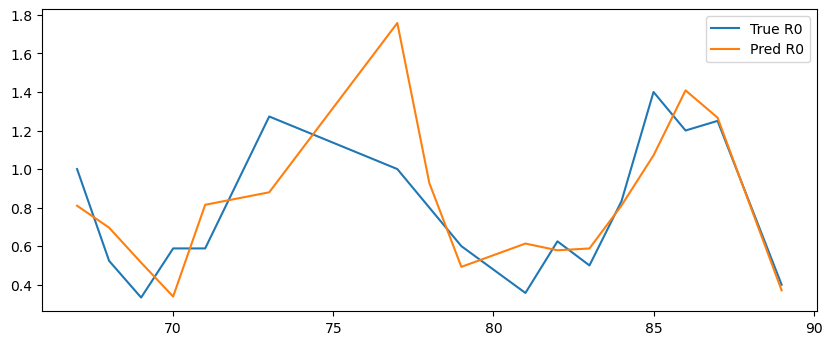

In [53]:
random_area = np.random.choice(pred_df['Area code'].unique())
select_df = pred_df[pred_df['Area code']==random_area]

plt.figure(figsize=(10,4), dpi=100)

plt.plot(select_df['cases_over_100_startdelta'], select_df['True R0'], label='True R0')
plt.plot(select_df['cases_over_100_startdelta'], select_df['Pred R0'], label='Pred R0')

plt.legend()
plt.show()

In [54]:
latest_data = all_data.groupby(by=['Area code'], as_index=False).last()

latest_data['r0_full_lockdown'] = latest_data['real_r0']

latest_data['r0_partial_lockdown'] = latest_data['real_r0']*1.5
latest_data['r0_reopening'] = latest_data['real_r0']*2

latest_data['risk_lockdown'] = 1 - (latest_data['currently_suseptible'] - (latest_data['r0_full_lockdown']*latest_data['active_infections']/14) + latest_data['recovered'])/latest_data['Population']
latest_data['risk_partial_lockdown'] = 1 - (latest_data['currently_suseptible'] - (latest_data['r0_partial_lockdown']*latest_data['active_infections']/14) + latest_data['recovered'])/latest_data['Population']
latest_data['risk_reopening'] = 1 - (latest_data['currently_suseptible'] - (latest_data['r0_reopening']*latest_data['active_infections']/14) + latest_data['recovered'])/latest_data['Population']

latest_data[[
    'Area code',
    'Name',
    'Date',
    'r0_full_lockdown',
    'r0_partial_lockdown',
    'r0_reopening',
    'risk_lockdown',
    'risk_partial_lockdown',
    'risk_reopening'
]].to_csv(r'./data/processed/latest_risks.csv', index=False)

In [55]:
latest_data.head()

,Area code,Daily lab-confirmed cases,Date,Name,Geography1,Population,grad_0,grad_n3,grad_n7,current_r0,...,Working age 16 to 64,Old Age Dependency Ratio,risk_score_2,AREALHECT,r0_full_lockdown,r0_partial_lockdown,r0_reopening,risk_lockdown,risk_partial_lockdown,risk_reopening
0,E06000001,0.0,2020-05-30,Hartlepool,Unitary Authority,93663,6.0,5.5,5.0,0.666667,...,61.4,31.7,0.000654,9355.95,0.400000,0.600000,0.800000,0.000637,0.000646,0.000655
1,E06000002,0.0,2020-05-30,Middlesbrough,Unitary Authority,140980,7.0,6.0,5.0,1.000000,...,62.5,26.2,0.000314,5388.88,0.600000,0.900000,1.200000,0.000311,0.000317,0.000323
2,E06000003,0.0,2020-05-30,Redcar and Cleveland,Unitary Authority,137150,7.0,8.5,10.0,0.571429,...,59.3,38.2,0.000339,24482.02,0.400000,0.600000,0.800000,0.000330,0.000335,0.000339
3,E06000004,0.0,2020-05-30,Stockton-on-Tees,Unitary Authority,197348,13.0,16.0,19.0,0.454545,...,61.6,30.0,0.000468,20496.25,0.263158,0.394737,0.526316,0.000444,0.000448,0.000452
4,E06000005,0.0,2020-05-30,Darlington,Unitary Authority,106803,14.0,10.0,6.0,2.750000,...,60.6,33.9,0.000386,19747.58,1.833333,2.750000,3.666667,0.000392,0.000414,0.000437


In [56]:
all_data['Date'].max()

Timestamp('2020-05-30 00:00:00')

In [57]:
joblib.dump(xgb, './data/models/xgb_realr0_model.joblib')

['./data/models/xgb_realr0_model.joblib']

In [58]:
pickle.dump(features, open(r'./data/models/xgb_realr0_features.pickle', 'wb'))

In [64]:
latest_data[[
    'Area code',
    'Name',
    'Date',
    'r0_full_lockdown',
    'r0_partial_lockdown',
    'r0_reopening',
    'risk_lockdown',
    'risk_partial_lockdown',
    'risk_reopening'
]].sort_values(by='r0_full_lockdown', ascending=False).head(50)

,Area code,Name,Date,r0_full_lockdown,r0_partial_lockdown,r0_reopening,risk_lockdown,risk_partial_lockdown,risk_reopening
202,E07000200,Babergh,2020-05-30,3.000000,4.500000,6.000000,0.000409,0.000445,0.000481
71,E07000039,South Derbyshire,2020-05-30,2.750000,4.125000,5.500000,0.000379,0.000410,0.000442
198,E07000196,South Staffordshire,2020-05-30,2.666667,4.000000,5.333333,0.000254,0.000274,0.000295
83,E07000064,Rother,2020-05-30,2.666667,4.000000,5.333333,0.000372,0.000401,0.000431
275,E09000003,Barnet,2020-05-30,2.666667,4.000000,5.333333,0.000111,0.000120,0.000129
131,E07000116,Tunbridge Wells,2020-05-30,2.200000,3.300000,4.400000,0.000409,0.000437,0.000465
4,E06000005,Darlington,2020-05-30,1.833333,2.750000,3.666667,0.000392,0.000414,0.000437
61,E07000029,Copeland,2020-05-30,1.800000,2.700000,3.600000,0.000844,0.000892,0.000940
47,E06000051,Shropshire,2020-05-30,1.666667,2.500000,3.333333,0.000332,0.000350,0.000368
182,E07000173,Gedling,2020-05-30,1.666667,2.500000,3.333333,0.000199,0.000210,0.000221
